# Part I - (Ford GoBike System Dataset Exploration)
## by Akbarshox

## Introduction
This Dataset contains details of individuals borrowed bikes from a bike-sharing system (called Ford GoBike System) covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Wrangling

In [2]:
df=pd.read_csv("dataset.csv")
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

As we can see above there are several problems with dataset: 
1. There are nulls
1. Several columns have inappropriate data types
1. Unsual birth_year 1878,I think this is typo error,So I will change it to 1978

I also decided to add columns to make it easier exploring, and also drop some columns

In [3]:
#droping rows containing nulls
df.drop(df[df.member_gender.isna()].index,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   175147 non-null  float64
 6   start_station_longitude  175147 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     175147 non-null  float64
 10  end_station_longitude    175147 non-null  float64
 11  bike_id                  175147 non-null  int64  
 12  user_type                175147 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#changing data types of columns
df.start_time=pd.to_datetime(df.start_time)
df.end_time=pd.to_datetime(df.end_time)


In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [7]:
#now I will drop unnecessary columns
df.drop(columns=["start_station_latitude","start_station_longitude","end_station_latitude","end_station_longitude"],inplace=True)

In [8]:
df.loc[df.member_birth_year==1878,"member_birth_year"]=1978

In [9]:
df.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year
count,175147.000000,174952.000000,174952.000000,175147.000000,175147.000000
mean,704.211845,139.002126,136.604486,4482.252639,1984.807008
std,1641.608363,111.648819,111.335635,1658.303747,10.113482
min,61.000000,3.000000,3.000000,11.000000,1900.000000
25%,323.000000,47.000000,44.000000,3802.000000,1980.000000
50%,510.000000,104.000000,101.000000,4959.000000,1987.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000


Below I add several columns to make it easier to explore

In [10]:
df["weekday"]=df.start_time.dt.weekday

In [11]:
#changing weekday to names o weeks
df.weekday.replace({
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
},inplace=True)

In [12]:
#Now we will calculate age of customers 
df["age"]=(2019-df.member_birth_year).astype("int")
df.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,age
count,175147.000000,174952.000000,174952.000000,175147.000000,175147.000000,175147.000000
mean,704.211845,139.002126,136.604486,4482.252639,1984.807008,34.192992
std,1641.608363,111.648819,111.335635,1658.303747,10.113482,10.113482
min,61.000000,3.000000,3.000000,11.000000,1900.000000,18.000000
25%,323.000000,47.000000,44.000000,3802.000000,1980.000000,27.000000
50%,510.000000,104.000000,101.000000,4959.000000,1987.000000,32.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000,39.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000,119.000000


As observations' starting year is 2019,we substracted birt_year from 2019. 

### What is the structure of your dataset?

This data set consists of 15 columns and over 183000 observation they are:
 
 0. duration_sec -Duration of rides,in seconds             
 1. start_time - Start time            
 2. end_time - End time             
 3. start_station_id  - Starting  stations' ID      
 4. start_station_name - Starting  stations' name     
 5. start_station_latitude  - Starting  stations' geographic location
 6. start_station_longitude - Starting  stations' geographic location
 7. end_station_id          
 8. end_station_name        
 9. end_station_latitude - Ending  stations' geographic location   
 10. end_station_longitude  - Ending  stations' geographic location 
 11. bike_id - Bikes' id              
 12. user_type - type of user ,whether customer or subscriber           
 13. member_birth_year - birth year off customer     
 14. member_gender - gender of customer
 15. bike_share_for_all_trip - whether enrolled in a program(Only for subscribers) 

As we do not need all of columns.So I droped several columns and created extra columns so that it is easier to explore 

### What is/are the main feature(s) of interest in your dataset?

1. When are most trips taken in terms of time of day, day of the week, or month of the year?
1. How long does the average trip take?
1. Does the above depend on if a user is a subscriber or customer?
2. Does gender affects trips length and its frequency

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. First one is duration_sec which can help me to find out how long the average trip take.
1. The second one is start_time from which I extracted weekdays,and month to find most trip taken weekdays and month 
1. The third one is user_type which can show whether user's type affect other features
1. The next one is member_gender with the help of which I can explore whether customers gender affects it's borrowing frequency and trip length

In [13]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Thursday,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,Thursday,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,Thursday,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,Thursday,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,Thursday,60


## Univariate Exploration


I will start checking distribution of interested variables and firs one is duration.

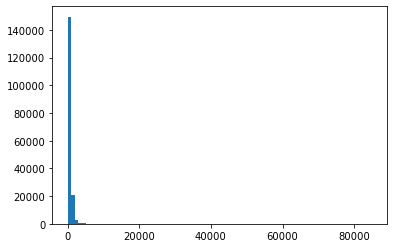

In [14]:
bins=np.arange(0,df.duration_sec.max()+1000,1000)
plt.hist(df.duration_sec,bins=bins);

As we can see above our has long-tail so,I will use log log scaling and use limit for x axes

(32.0, 10000.0)

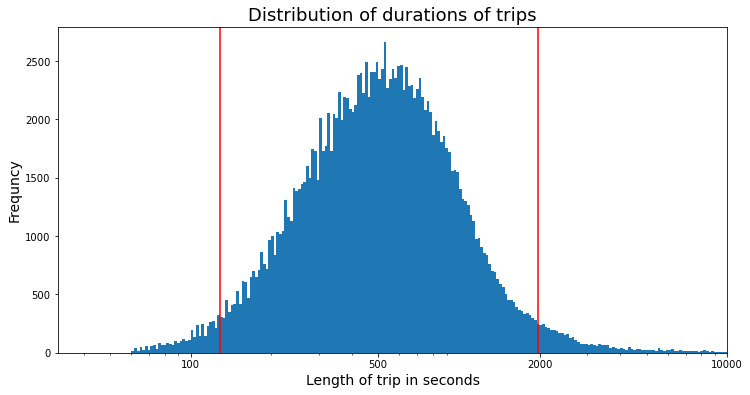

In [15]:
bins=10**np.arange(1.7,5+0.5+0.01,0.01)
plt.figure(figsize=(12,6))
plt.hist(df.duration_sec,bins=bins);
ticks=[100,500,2000,10000,85000]
labels=[f"{x}" for x in ticks]
plt.xscale("log")
plt.axvline(np.percentile(df.duration_sec,2.25),color="r")
plt.axvline(np.percentile(df.duration_sec,97.25),color="r")
plt.title("Distribution of durations of trips",fontsize=18)
plt.xlabel("Length of trip in seconds",fontsize=14)
plt.ylabel("Frequncy",fontsize=14)
plt.xticks(ticks,labels)
np.percentile(df.duration_sec,97.25)
plt.xlim(32,10000)

I used log scaling to make the distribution more clear to interpret.We can see from it that most customers borrow bikes for around 500 seconds,and I  also marked 2 red lines which shows where 95 percent of distribution lies,It is between about 120 and 2000

Next variable is member_gender.I would like to check is gender of customers.

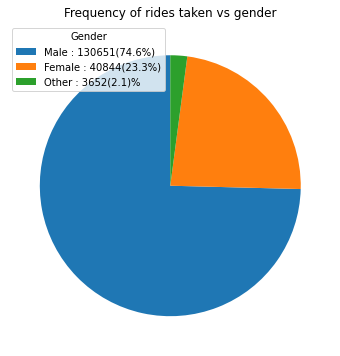

In [16]:
data=df.member_gender.value_counts()
data_p=((df.member_gender.value_counts()/df.member_gender.value_counts().sum())*100).round(1)
plt.figure(figsize=(10,6))
plt.title("Frequency of rides taken vs gender")
plt.pie(data,startangle=90)
plt.legend([f"Male : {data.values[0]}({data_p.values[0]}%)",f"Female : {data.values[1]}({data_p.values[1]}%)",f"Other : {data.values[2]}({data_p.values[2]})%"],title="Gender",loc=2)


Pie chart above ,shows that most frequntly rides taken by men (74.6%,130651) and women are in the second place(23.3,40844).We also have third group which is called Other(2.1%,3652),I think they are people about whose gender there is not information.

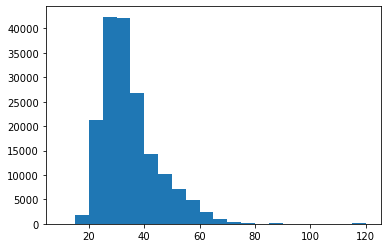

In [17]:
bins=np.arange(10,df.age.max()+5,5)
plt.hist(df.age,bins=bins);

Age distirbution also has long tail so I will use log-scaling and use xlim for limiting axes

Text(0, 0.5, 'Frequency')

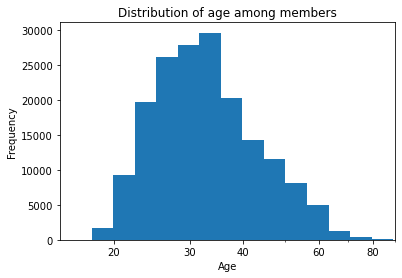

In [18]:
bins=10**np.arange(1.2,2.1+0.05,0.05)
plt.hist(df.age,bins=bins);
plt.xscale("log")
ticks=[20,30,40,60,80,100]
labels=[f"{x}" for x in ticks]
plt.xticks(ticks,labels)
plt.xlim(15,90)
plt.title("Distribution of age among members")
plt.xlabel("Age")
plt.ylabel("Frequency")

Distribution of age is unimodal with a peak between 30 and 40.This means that people between these ages takes rides frequently.We can also see this distribution in boxplot

(20.0, 65.0)

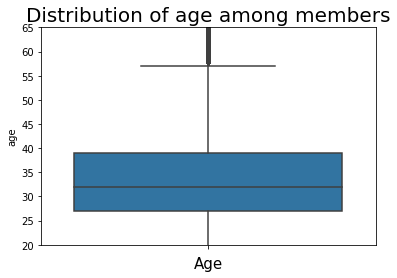

In [19]:
#making boxplot 
plt.title("Distribution of age among members",fontsize=20)
plt.xlabel("Age",fontsize=15)
sb.boxplot(data=df,y="age")
plt.ylim(20,65)

The Next variable is days of week.With the help of this variable we can find out in which day of the week rides are taken mostly 

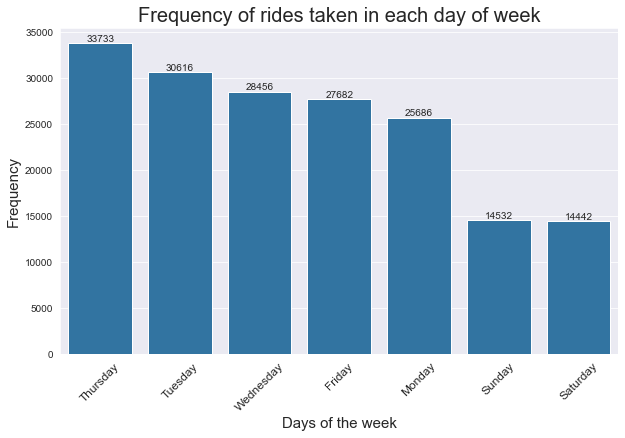

In [20]:
data=df.weekday.value_counts()
orders=data.index
sb.set_style("darkgrid")
plt.figure(figsize=(10,6))
base_color=sb.color_palette()[0]
sb.countplot(data=df,x="weekday",color=base_color,order=orders)
plt.xticks(rotation=45,fontsize=12)
plt.title("Frequency of rides taken in each day of week",fontsize=20)
plt.xlabel("Days of the week",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
for x in range(data.shape[0]):
    count=data[x]
    text=str(count)
    plt.text(x,count+200,text,ha="center")

Now we can see that most rides are taken in Thursday (33733) and least is in Saturday (14442).Interesting thing is that difference is not high in weekdays.But we can see drammatic decrease in weekends which is a bit strange.I think the reason is that most people take bikes to get their job,so there is not a lot of borrows in weekends.  

Now we will see top 10 station where most members take bikes from. 

Text(0, 0.5, 'Starting stations')

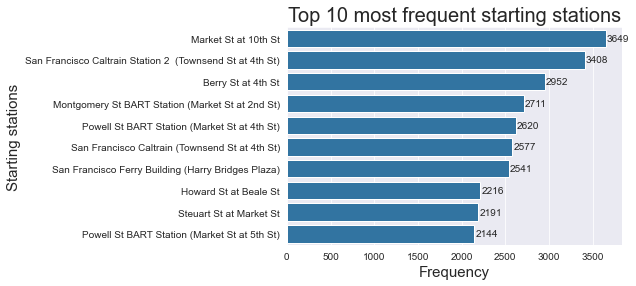

In [21]:
data=df.groupby("start_station_name").count()["duration_sec"].sort_values(ascending=False)[:10]
order=data.index
def top_station(df,y,order,data):
    sb.countplot(data=df,y=y,order=order,color=base_color)
    for i in range(data.shape[0]):
        count=data[i]
        text=str(count)
        plt.text(count+15,i,text,va="center")
top_station(df,"start_station_name",order,data)
plt.title("Top 10 most frequent starting stations",fontsize=20)
plt.xlabel("Frequency",fontsize=15)
plt.ylabel("Starting stations",fontsize=15)

In the above bar chart we can see top 10 starting stations ,in the first place `Market St at 10th St` stations with 3649 trips

The next variable is end_station_name.We can see where most members go after their trip 

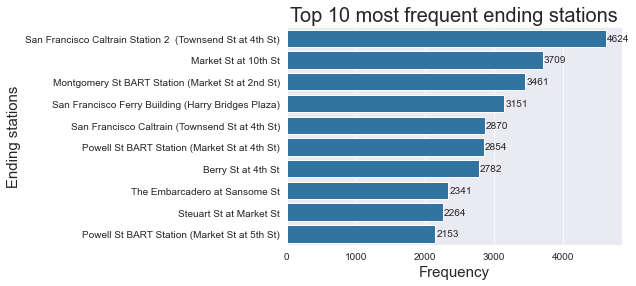

In [22]:
data=df.groupby("end_station_name").count()["duration_sec"].sort_values(ascending=False)[:10]
order=data.index
top_station(df,"end_station_name",order,data)
plt.title("Top 10 most frequent ending stations",fontsize=20)
plt.xlabel("Frequency",fontsize=15)
plt.ylabel("Ending stations",fontsize=15)
plt.show()

We can see that most frequnt ending station is `San Francisco Caltrain Station 2  (Townsend St at 4th St)` with 4624 trips endings,`Market St at 10th St` is in the second place with 3709

Final variable is user_type

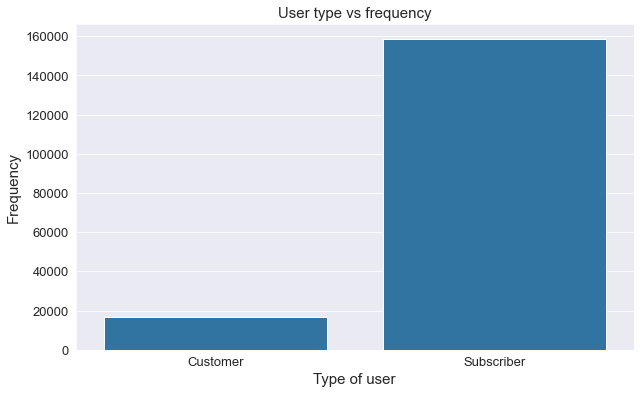

In [23]:
plt.figure(figsize=(10,6))
sb.countplot(data=df,x="user_type",color=base_color)
plt.xlabel("Type of user",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("User type vs frequency",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

According to visual above,we can conclude that most bikes are borrowed by subscribers (nearly 160000 occurance belongs to subscribers),less than 20000 occurance belongs to not subscribed customers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In this part,I explored gender,age ,duration,day of the week and user_type.When I worked with duration of trip i faced long-tail distribution ,so to make it more interpretable,I used log-scaling. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
>When I was going to explore age of customers ,I had to get that data,substracting member_birth_year from star_time,I also extracted day of week from start_time to see frequency in each day of weeks and as i mentioned before I had to use scaling to make visualization clear. 

## Bivariate Exploration


First pair of variables for bivariate exploration are age and duration

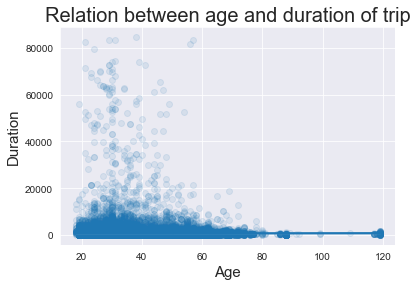

In [24]:
plt.title("Relation between age and duration of trip",fontsize=20)
sb.regplot(x=df.age,y=df.duration_sec,scatter_kws={"alpha":1/10})
plt.xlabel("Age",fontsize=15)
plt.ylabel("Duration",fontsize=15)
plt.show()

We can see that there is not correlation between age and duration of trip.What we can conclude from this visual is that most trips are made by people with age between 20 and about 70 and they last for maximum 200 seconds.It is strange, why so less

Next pair of variables are type of user and their gender.Now we will answer the question representative of which gender  is subscribed most.

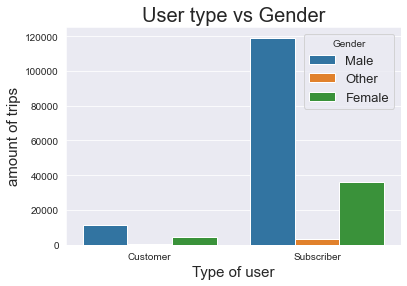

In [25]:
sb.countplot(data=df,hue="member_gender",x="user_type")
plt.title("User type vs Gender",fontsize=20)
plt.xlabel("Type of user",fontsize=15)
plt.ylabel("amount of trips",fontsize=15)
plt.legend(title="Gender",fontsize=13)
plt.show()

Now we can see that most trips are taken by subscribed males (about 120000) and in the second place females with approximately 40000 trips.Male trips are 3 times as much as Female trips are.Also among customers (not subscribed),Men are in the first place and Women are in the secon place.

Next pair is gender of member and length of trip.With this visual we can see which rides of which gender lasts more.

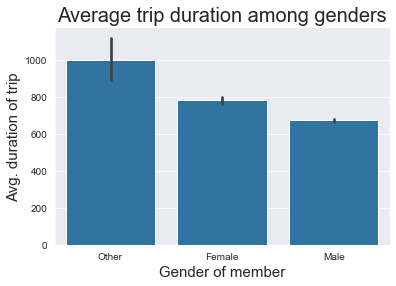

In [26]:
order=df.groupby("member_gender").mean()["duration_sec"].sort_values(ascending=False).index
def barplot(df,x,y,order):
    sb.barplot(data=df,x=x,y=y,color=base_color,order=order)
    
barplot(df,"member_gender","duration_sec",order)
plt.title("Average trip duration among genders",fontsize=20)
plt.xlabel("Gender of member",fontsize=15)
plt.ylabel("Avg. duration of trip",fontsize=15)
plt.show()


The highest average trip length is in other whose gender is not defined with average about 990 seconds ,and in the second place ,it is surprisng,is women with average 790 seconds and last one is men with average 670 seconds.According to this we can conclude that men takes rides more,but not long.   

The last pair is type of user and average length of trip. 

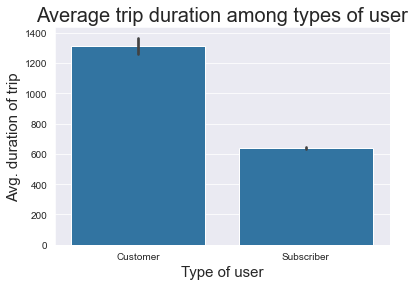

In [27]:
order=df.groupby("user_type").mean()["duration_sec"].sort_values(ascending=False).index
barplot(df,"user_type","duration_sec",order)
plt.title("Average trip duration among types of user",fontsize=20)
plt.xlabel("Type of user",fontsize=15)
plt.ylabel("Avg. duration of trip",fontsize=15)
plt.show()

Bar chart above shows that average trip length is higher in not subscribed customers with 1300 seconds and for subscribers it is 640 seconds.What we can conclude from this is that subscribers takes bikes frequently but not for long time. 

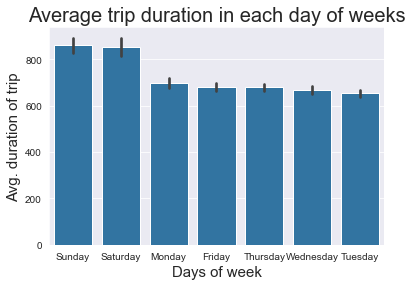

In [28]:
order=df.groupby("weekday").mean()["duration_sec"].sort_values(ascending=False).index
barplot(df,"weekday","duration_sec",order)
plt.title("Average trip duration in each day of weeks",fontsize=20)
plt.xlabel("Days of week",fontsize=15)
plt.ylabel("Avg. duration of trip",fontsize=15)

plt.show()

We can see tha average trip length is higher in weekends both more than 800 seconds ,in weekdays there is not high range of difference all of there are about 680 seconds.I think the reason is that in weekdays more people take bikes to go to work and in weekends just for having a rest from busy life routine

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this part ,I have explored relationship between several variables:

1. Age and Duration of trip :There was not correlation between these variables.Only thing what I got from them is that most trips are made by people with age between 20 and about 70 and they last for maximum 200 seconds.It is strange, why so less
1. Type of user and their gender: most trips are taken by subscribed males (about 120000) and in the second place females with approximately 40000 trips.Male trips are 3 times as much as Female trips are.Also among customers (not subscribed),Men are in the first place and Women are in the secon place.
1. Average trip duration and gender: The highest average trip length is in "other" whose gender is not defined with average about 990 seconds ,and in the second place ,it is surprisng,is women with average 790 seconds and last one is men with average 670 seconds.According to this we can conclude that men takes rides more,but not long.
1. Average trip duration and type of users:average trip length is higher in not subscribed customers with 1300 seconds and for subscribers it is 640 seconds.What we can conclude from this is that subscribers takes bikes frequently but not for long time.
1. Average trip duration and days of week: The average trip length is higher in weekends both more than 800 seconds ,in weekdays there is not high range of difference all of there are about 680 seconds.I think the reason is that in weekdays more people take bikes to go to work and in weekends just for having a rest from busy life routine

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was not any relationship between other variables.

## Multivariate Exploration


Firstly, I am goin to see average duration of trip in each day of week by genders

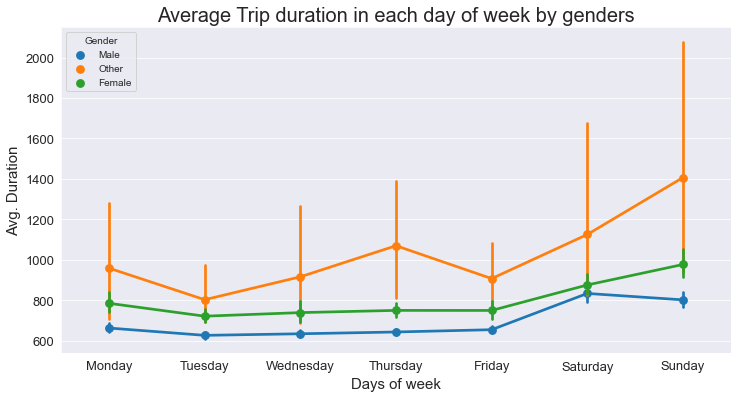

In [29]:
plt.figure(figsize=(12,6))
sb.pointplot(data=df,x="weekday",y="duration_sec",hue="member_gender",order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],ci=95)
plt.title("Average Trip duration in each day of week by genders",fontsize=20)
plt.xlabel("Days of week",fontsize=15)
plt.ylabel("Avg. Duration",fontsize=15)
plt.legend(title="Gender")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In this visualization, we can see that the highest overall avegrage is in other and second place for women and last one is men.They all have the same pattern between Monday an Saturday,but in sunday both other and female rise when men fall.

The next variables are duration,weekdays and user type.I am goin to see average duration of trip in each day of week by different user types

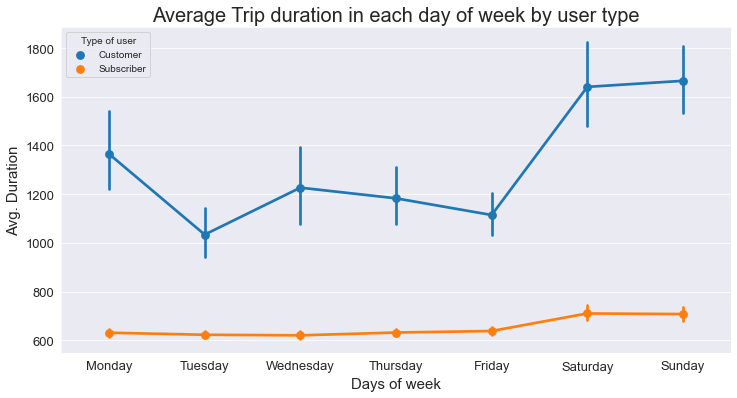

In [30]:
plt.figure(figsize=(12,6))
sb.pointplot(data=df,x="weekday",y="duration_sec",hue="user_type",order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],ci=95)
plt.title("Average Trip duration in each day of week by user type",fontsize=20)
plt.xlabel("Days of week",fontsize=15)
plt.ylabel("Avg. Duration",fontsize=15)
plt.legend(title="Type of user")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

Now we can see that in overall highest durations are in not subscribed customers(all over 1000 seconds) and subscribers are less than 800 seconds in each week.We can see flactution in customers graph.High points are in Saturday and sunday,Sunday being the highest.But in subscribers, highest point is Saturday 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part,I explored the main features,They are:

Duration,weekdays and user type:the highest overall avegrage is in other and second place for women and last one is men.They all have the same pattern between Monday an Saturday,but in sunday both other and female rise when men fall.Highest points differ,for women it is on Sunday (about 1000 seconds),for men it is on saturday (about 810 seconds)

Duration,weekdays and user type:In overall highest durations are in not subscribed customers(all over 1000 seconds) and subscribers are less than 800 seconds in each week.We can see flactution in customers graph.High points are in Saturday and sunday,Sunday being the highest.But in subscribers, highest point is Saturday

### Were there any interesting or surprising interactions between features?

> The thing which I dounda interesting is that when i first see relations between gender and trip frequency,men were active.So i thought that also duration would be also higher for men.But that was not true,it turned out that length of trip for women are more than men.

## Conclusions
>After all,there are several point that I would like to poin out:
- Mean of distribution of duration is 500, which means that most members take bikes for 500 seconds 
- As for age of member common age is about 32,but there is also people aged 80.
- The most common gender is Males (about 74 %) and then Females(about 24 %).But there are also type of member whose gender is marked as "other"(2 %)
- Despite fact that men being most frequent members,They don't take long trips(Avg. 680 seconds),this feature can be seen in females (Avg. 790 seconds)
- When it comes to days of the week,Saturday are least frequent,but most long trips happens in these days 


In [31]:
df.to_csv("explanationdata.csv",index=False)